In [2]:
import pandas as pd
import sentence_transformers
from lightgbm import LGBMClassifier



In [7]:
resumes = pd.read_csv("/Users/sky/Library/CloudStorage/GoogleDrive-skyjin0127@gmail.com/其他计算机/我的笔记本电脑/jzt/BU课程/Spring_2025/CS506/project/" \
"cs506-project/datasets/processed_data/plain_resume.csv")
# jobs = pd.read_csv("datasets/processed_data/cleaned_job_data.csv")
outcomes = pd.read_csv("/Users/sky/Library/CloudStorage/GoogleDrive-skyjin0127@gmail.com/其他计算机/我的笔记本电脑/jzt/BU课程/Spring_2025/CS506/project/" \
"cs506-project/datasets/processed_data/encoded_cleaned_recruitment_data.csv")



In [8]:
# resumes = resumes.reset_index(drop=True)
outcomes = outcomes.reset_index(drop=True)
merged = pd.concat([resumes, outcomes], axis=1)

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
merged["resume_embedding"] = merged["Resume"].apply(lambda x: model.encode(str(x)))



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = merged[["ExperienceYears", "InterviewScore", "SkillScore", "PersonalityScore",
             "Gender_encoded" ,"EducationLevel_encoded", "RecruitmentStrategy_encoded"]]  # + more if you want
y = merged["HiringDecision"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LGBMClassifier()
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

[LightGBM] [Info] Number of positive: 380, number of negative: 820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316667 -> initscore=-0.769133
[LightGBM] [Info] Start training from score -0.769133
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       215
           1       0.88      0.81      0.85        85

    accuracy                           0.92       300
   macro avg       0.91      0.88      0.89       300
weighted avg       0.92      0.92      0.92       300



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


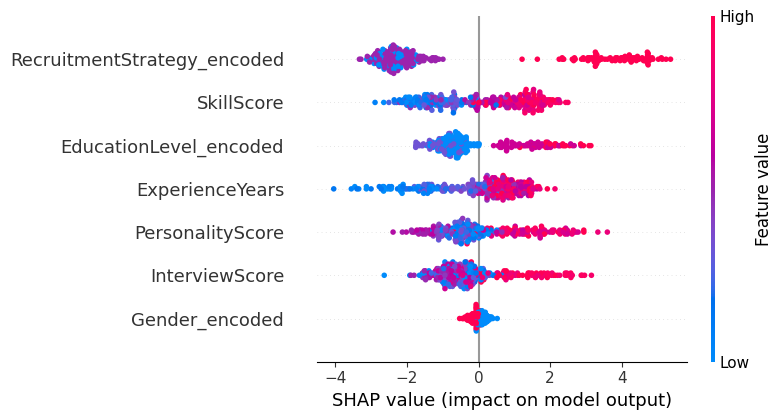

In [10]:

import shap
explainer = shap.Explainer(clf, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [11]:

import matplotlib.pyplot as plt
import os

# Create the folder if it doesn't exist
os.makedirs("figures", exist_ok=True)

# ✅ Force SHAP to use Matplotlib (not JS rendering)
shap.summary_plot(shap_values, X_test, show=False)  # show=False = don't auto-display

# ✅ Now this WILL grab the right SHAP figure
plt.savefig("figures/shap_experience_plot.png", dpi=300, bbox_inches="tight")
plt.close()